# Cat Breed Dataset Statistical Analysis

This notebook provides a comprehensive statistical analysis of the cat breed dataset used in the classification project. We'll explore the distribution of images across breeds, analyze image properties, and visualize samples from the dataset.

## Objectives:
1. Understand the dataset structure and distribution
2. Analyze image dimensions, aspect ratios, and file sizes
3. Visualize sample images from different breeds
4. Identify potential data imbalances or quality issues

The insights from this analysis will help inform preprocessing steps and model design choices for the cat breed classification system.

## 1. Import Required Libraries

Let's import all the necessary libraries for our analysis:

In [7]:
# System libraries
import os
import logging
from pathlib import Path
from typing import Dict, List, Tuple, Any
import random
import json
from collections import Counter

# Data manipulation and analysis
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

# Image processing
from PIL import Image
import cv2

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
from matplotlib.axes import Axes

# Configure the notebook
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Display all columns in pandas DataFrames
pd.set_option('display.max_columns', None)

c:\Users\phuongnam-d\anaconda3\envs\cat\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load and Explore Dataset Structure

Let's begin by exploring the structure of our dataset. We'll define the data directory path and inspect the cat breed folders.

In [2]:
# Define the dataset directory path
PROJECT_ROOT = Path(os.getcwd()).parent
DATA_DIR = PROJECT_ROOT / "data" / "processed"

# Check if the directory exists
if not DATA_DIR.exists():
    logger.error(f"Data directory not found at {DATA_DIR}")
    raise FileNotFoundError(f"Data directory not found at {DATA_DIR}")

# Function to get dataset structure
def get_dataset_structure(data_dir: Path) -> Dict[str, int]:
    """
    Get the structure of the dataset.
    
    Args:
        data_dir: Path to the data directory
        
    Returns:
        Dictionary mapping breed names to number of images
    """
    breed_counts = {}
    
    # List all directories (breeds)
    breed_dirs = [d for d in data_dir.iterdir() if d.is_dir()]
    
    for breed_dir in breed_dirs:
        breed_name = breed_dir.name
        image_files = [f for f in breed_dir.glob('*') if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]
        breed_counts[breed_name] = len(image_files)
    
    return breed_counts

# Get dataset statistics
breed_counts = get_dataset_structure(DATA_DIR)

# Display basic dataset information
print(f"Total number of breeds: {len(breed_counts)}")
print(f"Total number of images: {sum(breed_counts.values())}")
print(f"Dataset directory: {DATA_DIR}")
print("\nFirst 5 breeds:")
for i, (breed, count) in enumerate(list(breed_counts.items())[:5]):
    print(f"  - {breed}: {count} images")

Total number of breeds: 21
Total number of images: 11050
Dataset directory: d:\Personal\Embeyeu\Study\Hust\IT 3320E - Intro to DL\Capstone Project\data\processed

First 5 breeds:
  - Abyssinian: 543 images
  - American Bobtail: 725 images
  - American Curl: 350 images
  - American Shorthair: 725 images
  - Bengal: 525 images


## 3. Count Images per Cat Breed

Let's organize the image counts into a DataFrame for better analysis and create a table showing the distribution of images across breeds.

In [3]:
# Create DataFrame from breed counts
breed_df = pd.DataFrame({
    'Breed': list(breed_counts.keys()),
    'Image_Count': list(breed_counts.values())
}).sort_values('Image_Count', ascending=False).reset_index(drop=True)

# Add percentage column
total_images = breed_df['Image_Count'].sum()
breed_df['Percentage'] = (breed_df['Image_Count'] / total_images * 100).round(2)

# Calculate statistics
min_images = breed_df['Image_Count'].min()
max_images = breed_df['Image_Count'].max()
mean_images = breed_df['Image_Count'].mean()
median_images = breed_df['Image_Count'].median()

# Display summary statistics
print(f"Image count statistics:")
print(f"  - Minimum: {min_images} images")
print(f"  - Maximum: {max_images} images")
print(f"  - Mean: {mean_images:.2f} images")
print(f"  - Median: {median_images:.2f} images")
print(f"\nClass imbalance ratio (max/min): {max_images/min_images:.2f}x")

# Display the table of breeds and their image counts
breed_df.head(21)

Image count statistics:
  - Minimum: 350 images
  - Maximum: 725 images
  - Mean: 526.19 images
  - Median: 525.00 images

Class imbalance ratio (max/min): 2.07x


Breed  Image_Count  Percentage
0     American Bobtail          725        6.56
1   American Shorthair          725        6.56
2           Maine Coon          725        6.56
3    British Shorthair          725        6.56
4         Egyptian Mau          725        6.56
5         Russian Blue          725        6.56
6           Abyssinian          543        4.91
7              Siamese          530        4.80
8               Sphynx          527        4.77
9              Ragdoll          525        4.75
10              Bengal          525        4.75
11              Birman          525        4.75
12              Bombay          525        4.75
13             Persian          525        4.75
14              Tuxedo          375        3.39
15       American Curl          350        3.17
16    Exotic Shorthair          350        3.17
17    Norwegian Forest          350        3.17
18                Manx          350        3.17
19       Scottish Fold          350        3.17
20      Turkish Angora          350        3.17

## 4. Visualize Class Distribution

Let's create visual representations of the class distribution to better understand the dataset balance.

C:\Users\phuongnam-d\AppData\Local\Temp\ipykernel_2640\367484398.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Breed', y='Image_Count', data=breed_df, palette=colors)
C:\Users\phuongnam-d\AppData\Local\Temp\ipykernel_2640\367484398.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


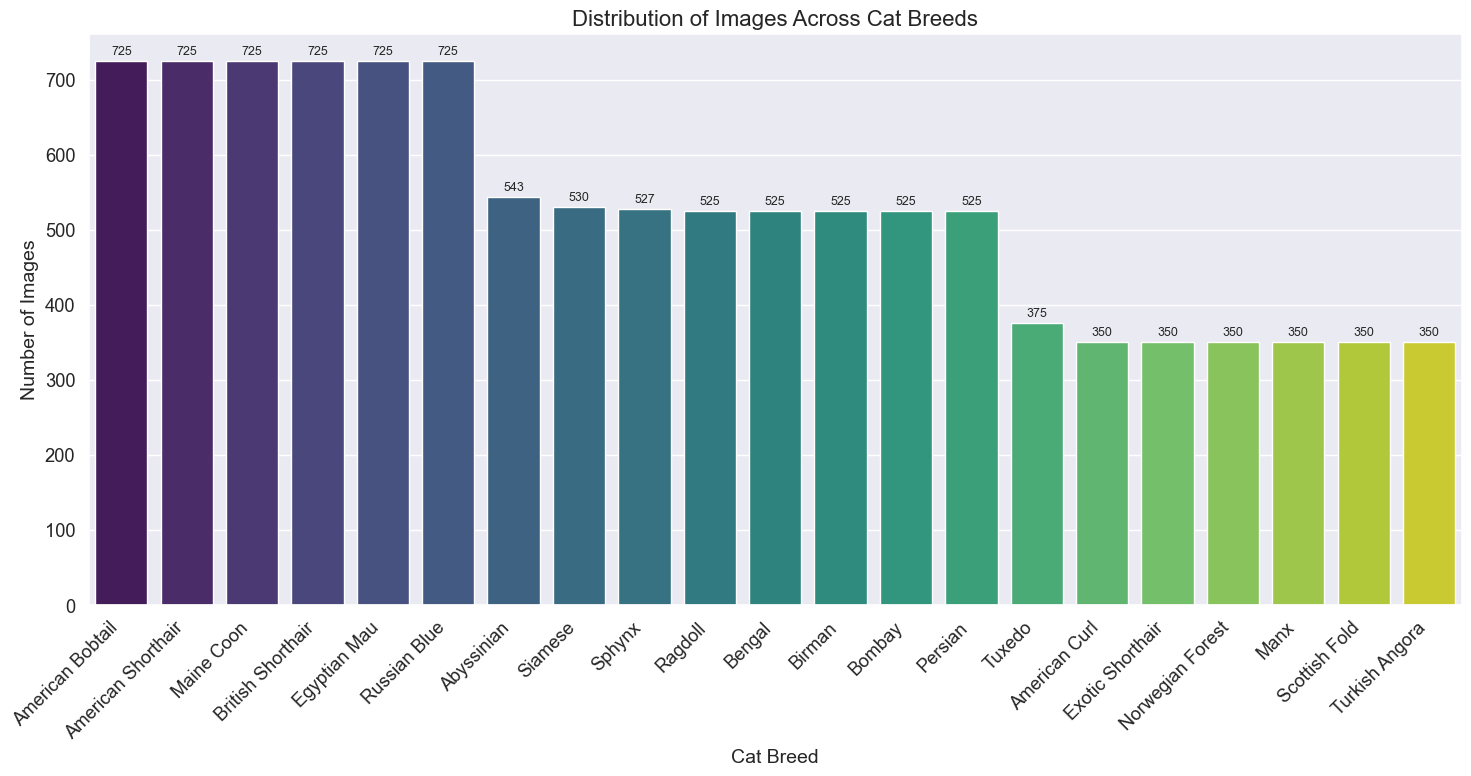

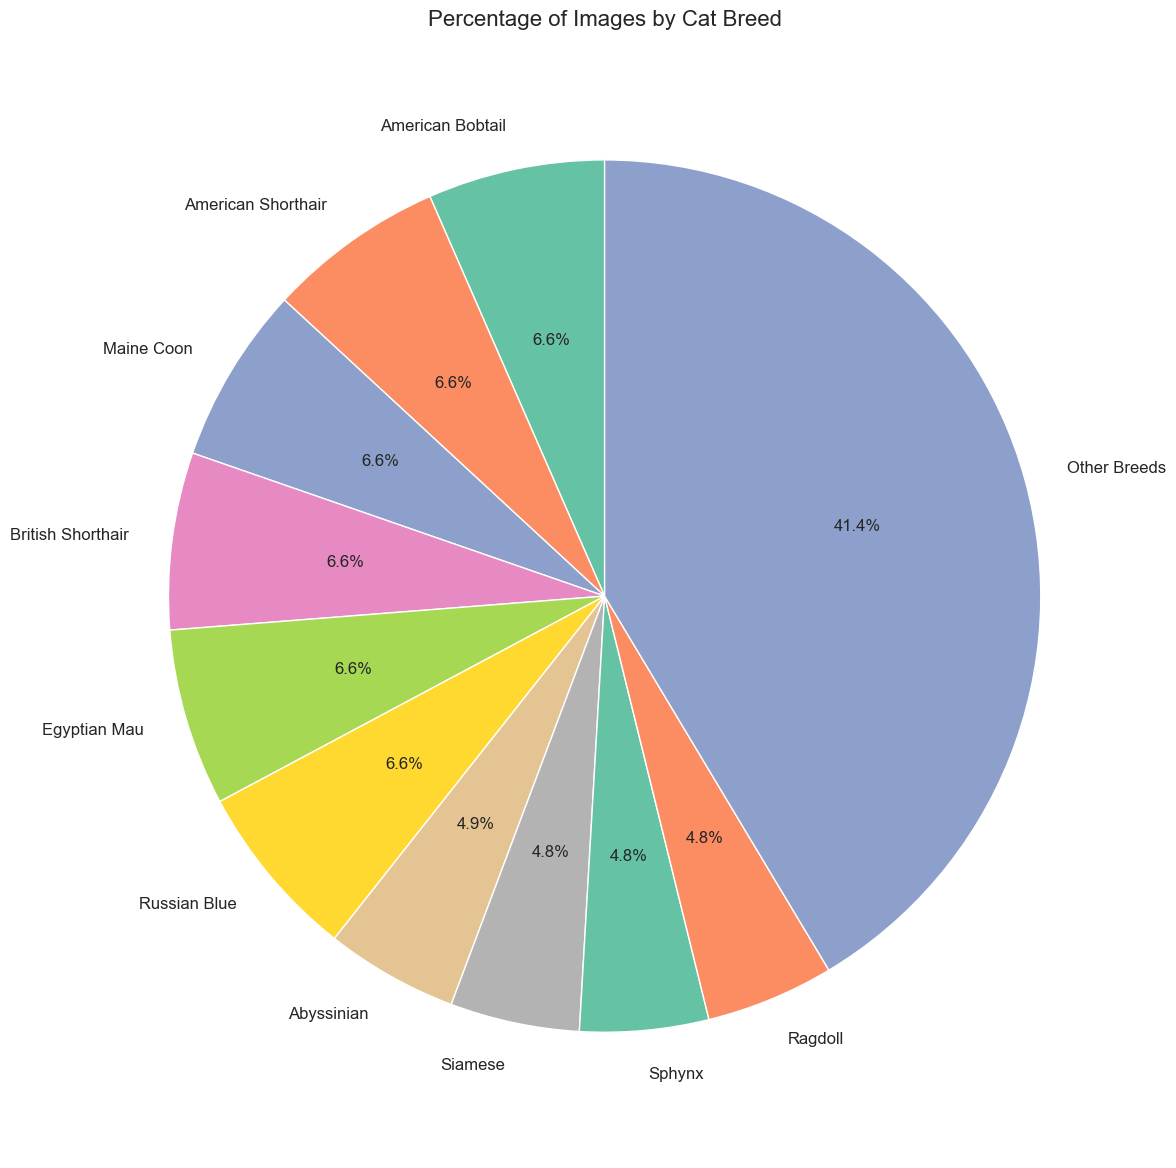

In [4]:
# Set figure size for better visualization
plt.figure(figsize=(15, 8))

# Create color palette that transitions from dark to light
colors = sns.color_palette("viridis", n_colors=len(breed_df))

# Create bar chart
ax = sns.barplot(x='Breed', y='Image_Count', data=breed_df, palette=colors)

# Customize the plot
ax.set_title('Distribution of Images Across Cat Breeds', fontsize=16)
ax.set_xlabel('Cat Breed', fontsize=14)
ax.set_ylabel('Number of Images', fontsize=14)

# Display the breed names at an angle for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add count labels on top of bars
for i, count in enumerate(breed_df['Image_Count']):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=9)

# Adjust layout for better viewing
plt.tight_layout()
plt.show()

# Create a pie chart for the distribution
plt.figure(figsize=(12, 12))

# Select top breeds for better visualization (merge small ones into "Other")
top_n = 10
top_breeds = breed_df.head(top_n).copy()
other_breeds = breed_df.iloc[top_n:].copy()

if not other_breeds.empty:
    other_row = pd.DataFrame({
        'Breed': ['Other Breeds'],
        'Image_Count': [other_breeds['Image_Count'].sum()],
        'Percentage': [other_breeds['Percentage'].sum()]
    })
    pie_df = pd.concat([top_breeds, other_row], ignore_index=True)
else:
    pie_df = top_breeds

# Create a custom color palette
pie_colors = sns.color_palette("Set2", n_colors=len(pie_df))

# Plot the pie chart
plt.pie(
    pie_df['Image_Count'], 
    labels=pie_df['Breed'], 
    autopct='%1.1f%%',
    startangle=90,
    colors=pie_colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 12}
)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Percentage of Images by Cat Breed', fontsize=16)
plt.tight_layout()
plt.show()

## 5. Analyze Image Dimensions and Aspect Ratios

Let's analyze the dimensions, aspect ratios, and file sizes of the images in our dataset. We'll randomly sample images from each breed to get a representative view.

In [8]:
# Function to analyze image properties
def analyze_image_properties(data_dir: Path, n_samples_per_breed: int = 20) -> pd.DataFrame:
    """
    Analyze image properties from the dataset.
    
    Args:
        data_dir: Path to the data directory
        n_samples_per_breed: Number of images to sample from each breed
        
    Returns:
        DataFrame with image properties
    """
    image_properties = []
    
    # List all directories (breeds)
    breed_dirs = [d for d in data_dir.iterdir() if d.is_dir()]
    
    for breed_dir in tqdm(breed_dirs, desc="Analyzing breeds"):
        breed_name = breed_dir.name
        
        # Get all image files
        image_files = list(breed_dir.glob('*.jpg')) + list(breed_dir.glob('*.jpeg')) + list(breed_dir.glob('*.png'))
        
        # Sample images
        samples = min(n_samples_per_breed, len(image_files))
        sampled_images = random.sample(image_files, samples)
        
        # Analyze each sampled image
        for img_path in sampled_images:
            try:
                # Get file size in KB
                file_size_kb = os.path.getsize(img_path) / 1024
                
                # Open image and get dimensions
                with Image.open(img_path) as img:
                    width, height = img.size
                    aspect_ratio = width / height
                    
                # Store the properties
                image_properties.append({
                    'breed': breed_name,
                    'filename': img_path.name,
                    'width': width,
                    'height': height,
                    'aspect_ratio': aspect_ratio,
                    'file_size_kb': file_size_kb
                })
            except Exception as e:
                logger.warning(f"Error analyzing {img_path}: {e}")
    
    return pd.DataFrame(image_properties)

# Get image properties
image_props_df = analyze_image_properties(DATA_DIR, n_samples_per_breed=20)

# Display basic statistics
print("Image Properties Summary:")
print(f"Total sampled images: {len(image_props_df)}")

# Display summary statistics for dimensions
print("\nDimension Statistics:")
print(image_props_df[['width', 'height', 'aspect_ratio', 'file_size_kb']].describe())

# Show first few rows
image_props_df.head()


















Analyzing breeds: 100%|██████████| 21/21 [00:01<00:00, 14.96it/s]

Image Properties Summary:
Total sampled images: 420

Dimension Statistics:
             width       height  aspect_ratio  file_size_kb
count   420.000000   420.000000    420.000000    420.000000
mean    452.266667   446.269048      1.123515     54.260021
std     343.020460   380.219553      0.337944     77.418857
min     200.000000   126.000000      0.450070      4.109375
25%     300.000000   225.000000      0.764801     12.596924
50%     300.000000   333.000000      1.191017     18.024414
75%     474.000000   472.000000      1.340015     67.769287
max    2048.000000  2048.000000      2.380952    661.527344


breed                    filename  width  height  aspect_ratio  \
0  Abyssinian          Abyssinian_350.jpg    300     225      1.333333   
1  Abyssinian  Abyssinian-45992932_73.jpg    200     150      1.333333   
2  Abyssinian          Abyssinian_212.jpg    300     346      0.867052   
3  Abyssinian          Abyssinian_304.jpg    300     225      1.333333   
4  Abyssinian  Abyssinian-45996727_54.jpg    300     303      0.990099   

   file_size_kb  
0     10.525391  
1      8.444336  
2     14.831055  
3     16.643555  
4     19.470703

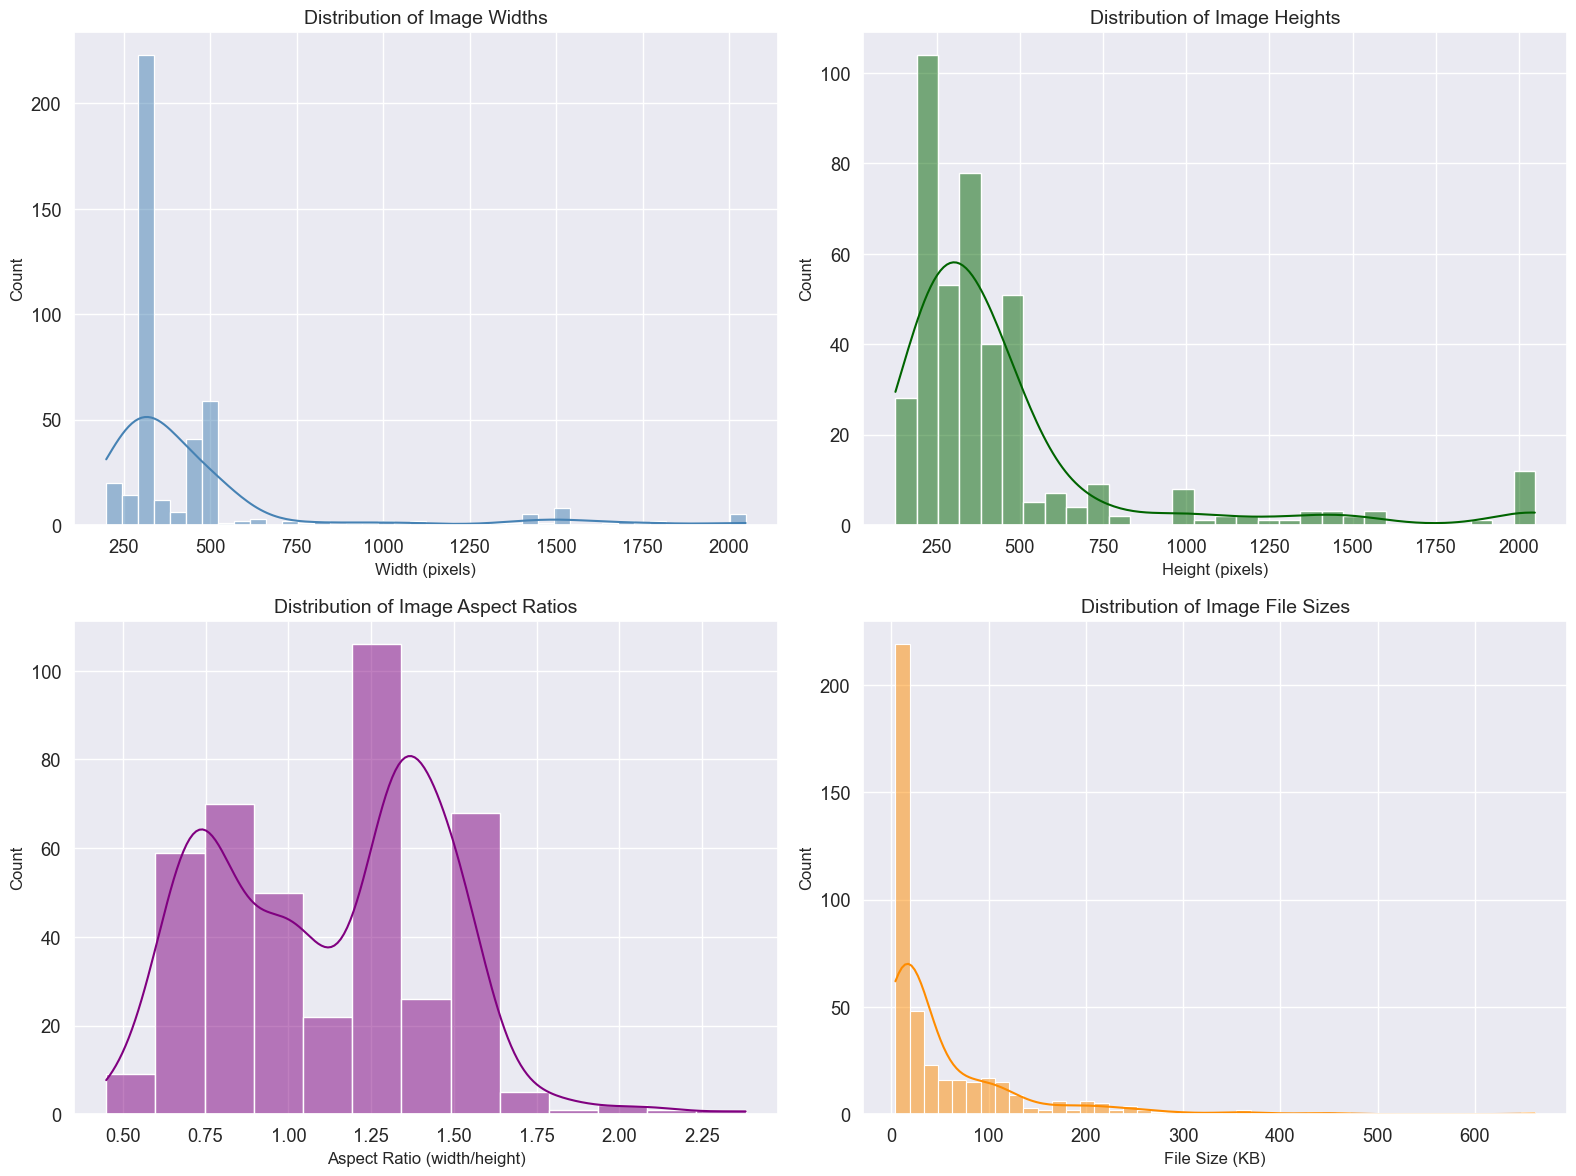

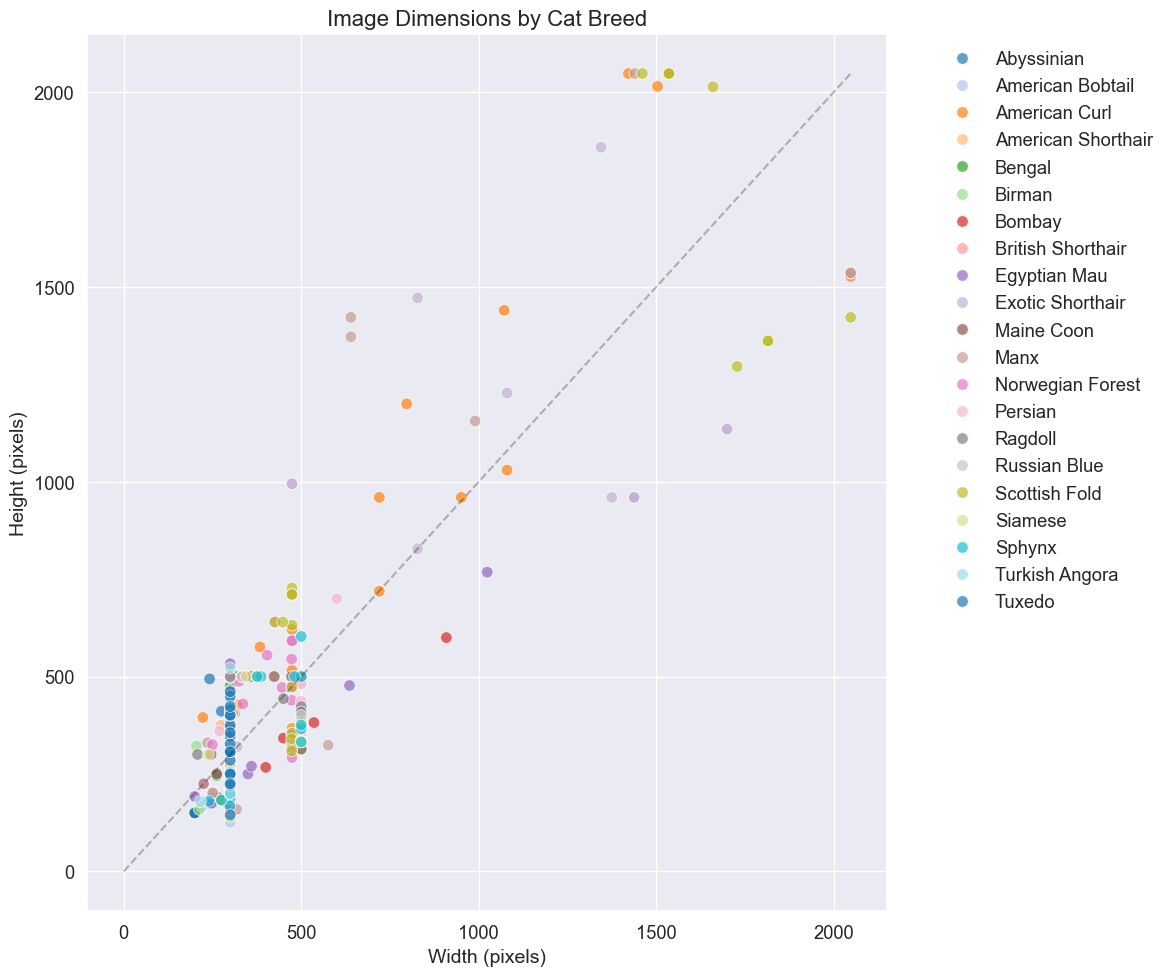

C:\Users\phuongnam-d\AppData\Local\Temp\ipykernel_2640\4103432546.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


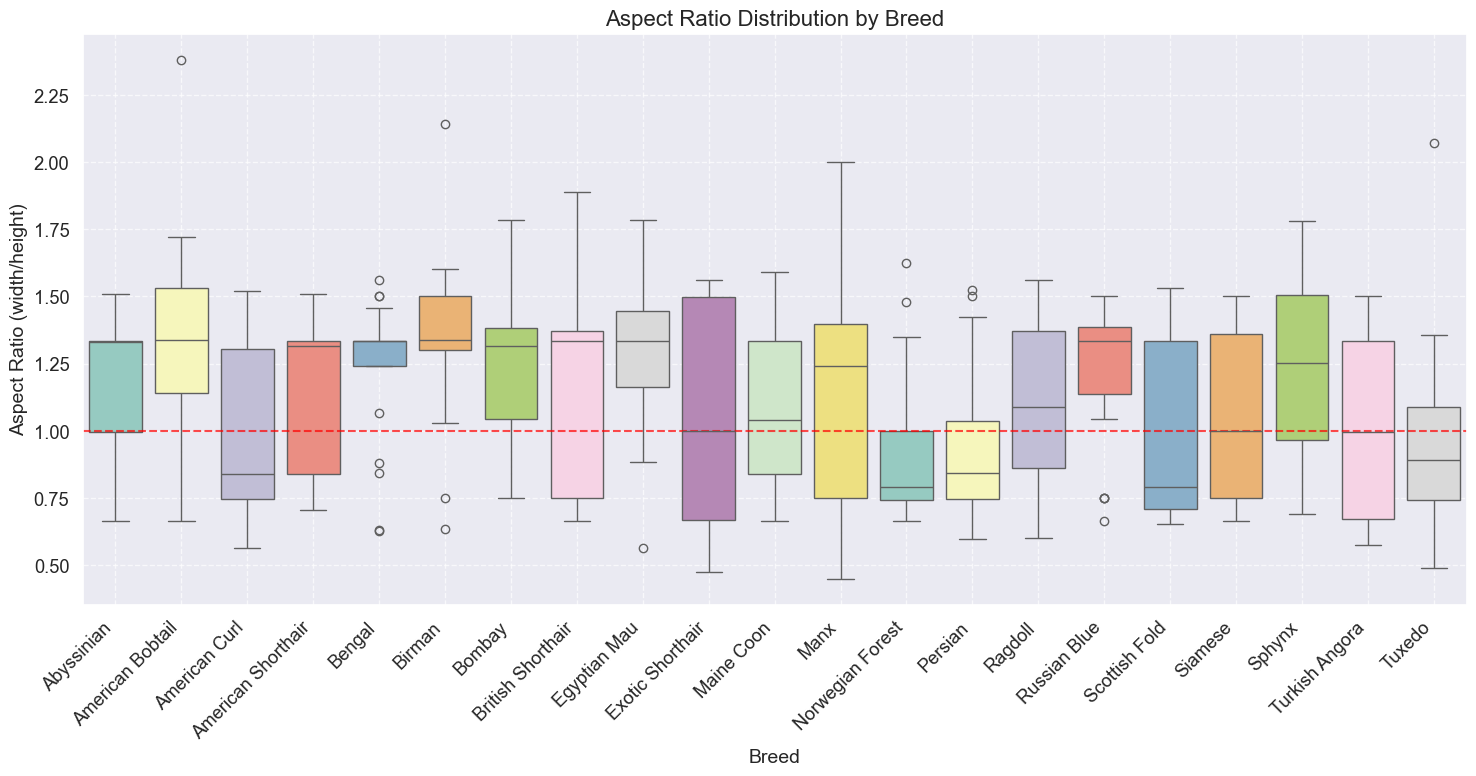

In [9]:
# Create a figure with multiple plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Define a common color palette
palette = "viridis"

# Plot 1: Width distribution
sns.histplot(data=image_props_df, x='width', kde=True, ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Distribution of Image Widths', fontsize=14)
axes[0, 0].set_xlabel('Width (pixels)', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

# Plot 2: Height distribution
sns.histplot(data=image_props_df, x='height', kde=True, ax=axes[0, 1], color='darkgreen')
axes[0, 1].set_title('Distribution of Image Heights', fontsize=14)
axes[0, 1].set_xlabel('Height (pixels)', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

# Plot 3: Aspect ratio distribution
sns.histplot(data=image_props_df, x='aspect_ratio', kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Distribution of Image Aspect Ratios', fontsize=14)
axes[1, 0].set_xlabel('Aspect Ratio (width/height)', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

# Plot 4: File size distribution
sns.histplot(data=image_props_df, x='file_size_kb', kde=True, ax=axes[1, 1], color='darkorange')
axes[1, 1].set_title('Distribution of Image File Sizes', fontsize=14)
axes[1, 1].set_xlabel('File Size (KB)', fontsize=12)
axes[1, 1].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Create a scatter plot of width vs height colored by breed
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(
    data=image_props_df, 
    x='width', 
    y='height',
    hue='breed',
    s=70,  # Marker size
    alpha=0.7,  # Transparency
    palette='tab20'  # Colormap
)

# Add labels
plt.title('Image Dimensions by Cat Breed', fontsize=16)
plt.xlabel('Width (pixels)', fontsize=14)
plt.ylabel('Height (pixels)', fontsize=14)

# Improve legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)

# Add a reference line for square images
plt.plot([0, max(image_props_df['width'].max(), image_props_df['height'].max())], 
         [0, max(image_props_df['width'].max(), image_props_df['height'].max())], 
         'k--', alpha=0.3, label='Square (1:1)')

plt.tight_layout()
plt.show()

# Create a boxplot showing aspect ratio by breed
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=image_props_df,
    x='breed',
    y='aspect_ratio',
    palette='Set3'
)

# Customize the plot
plt.title('Aspect Ratio Distribution by Breed', fontsize=16)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Aspect Ratio (width/height)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7)  # Reference line for square images
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6. Visualize Sample Images per Breed

Let's visualize sample images from different breeds to better understand the dataset's visual characteristics.

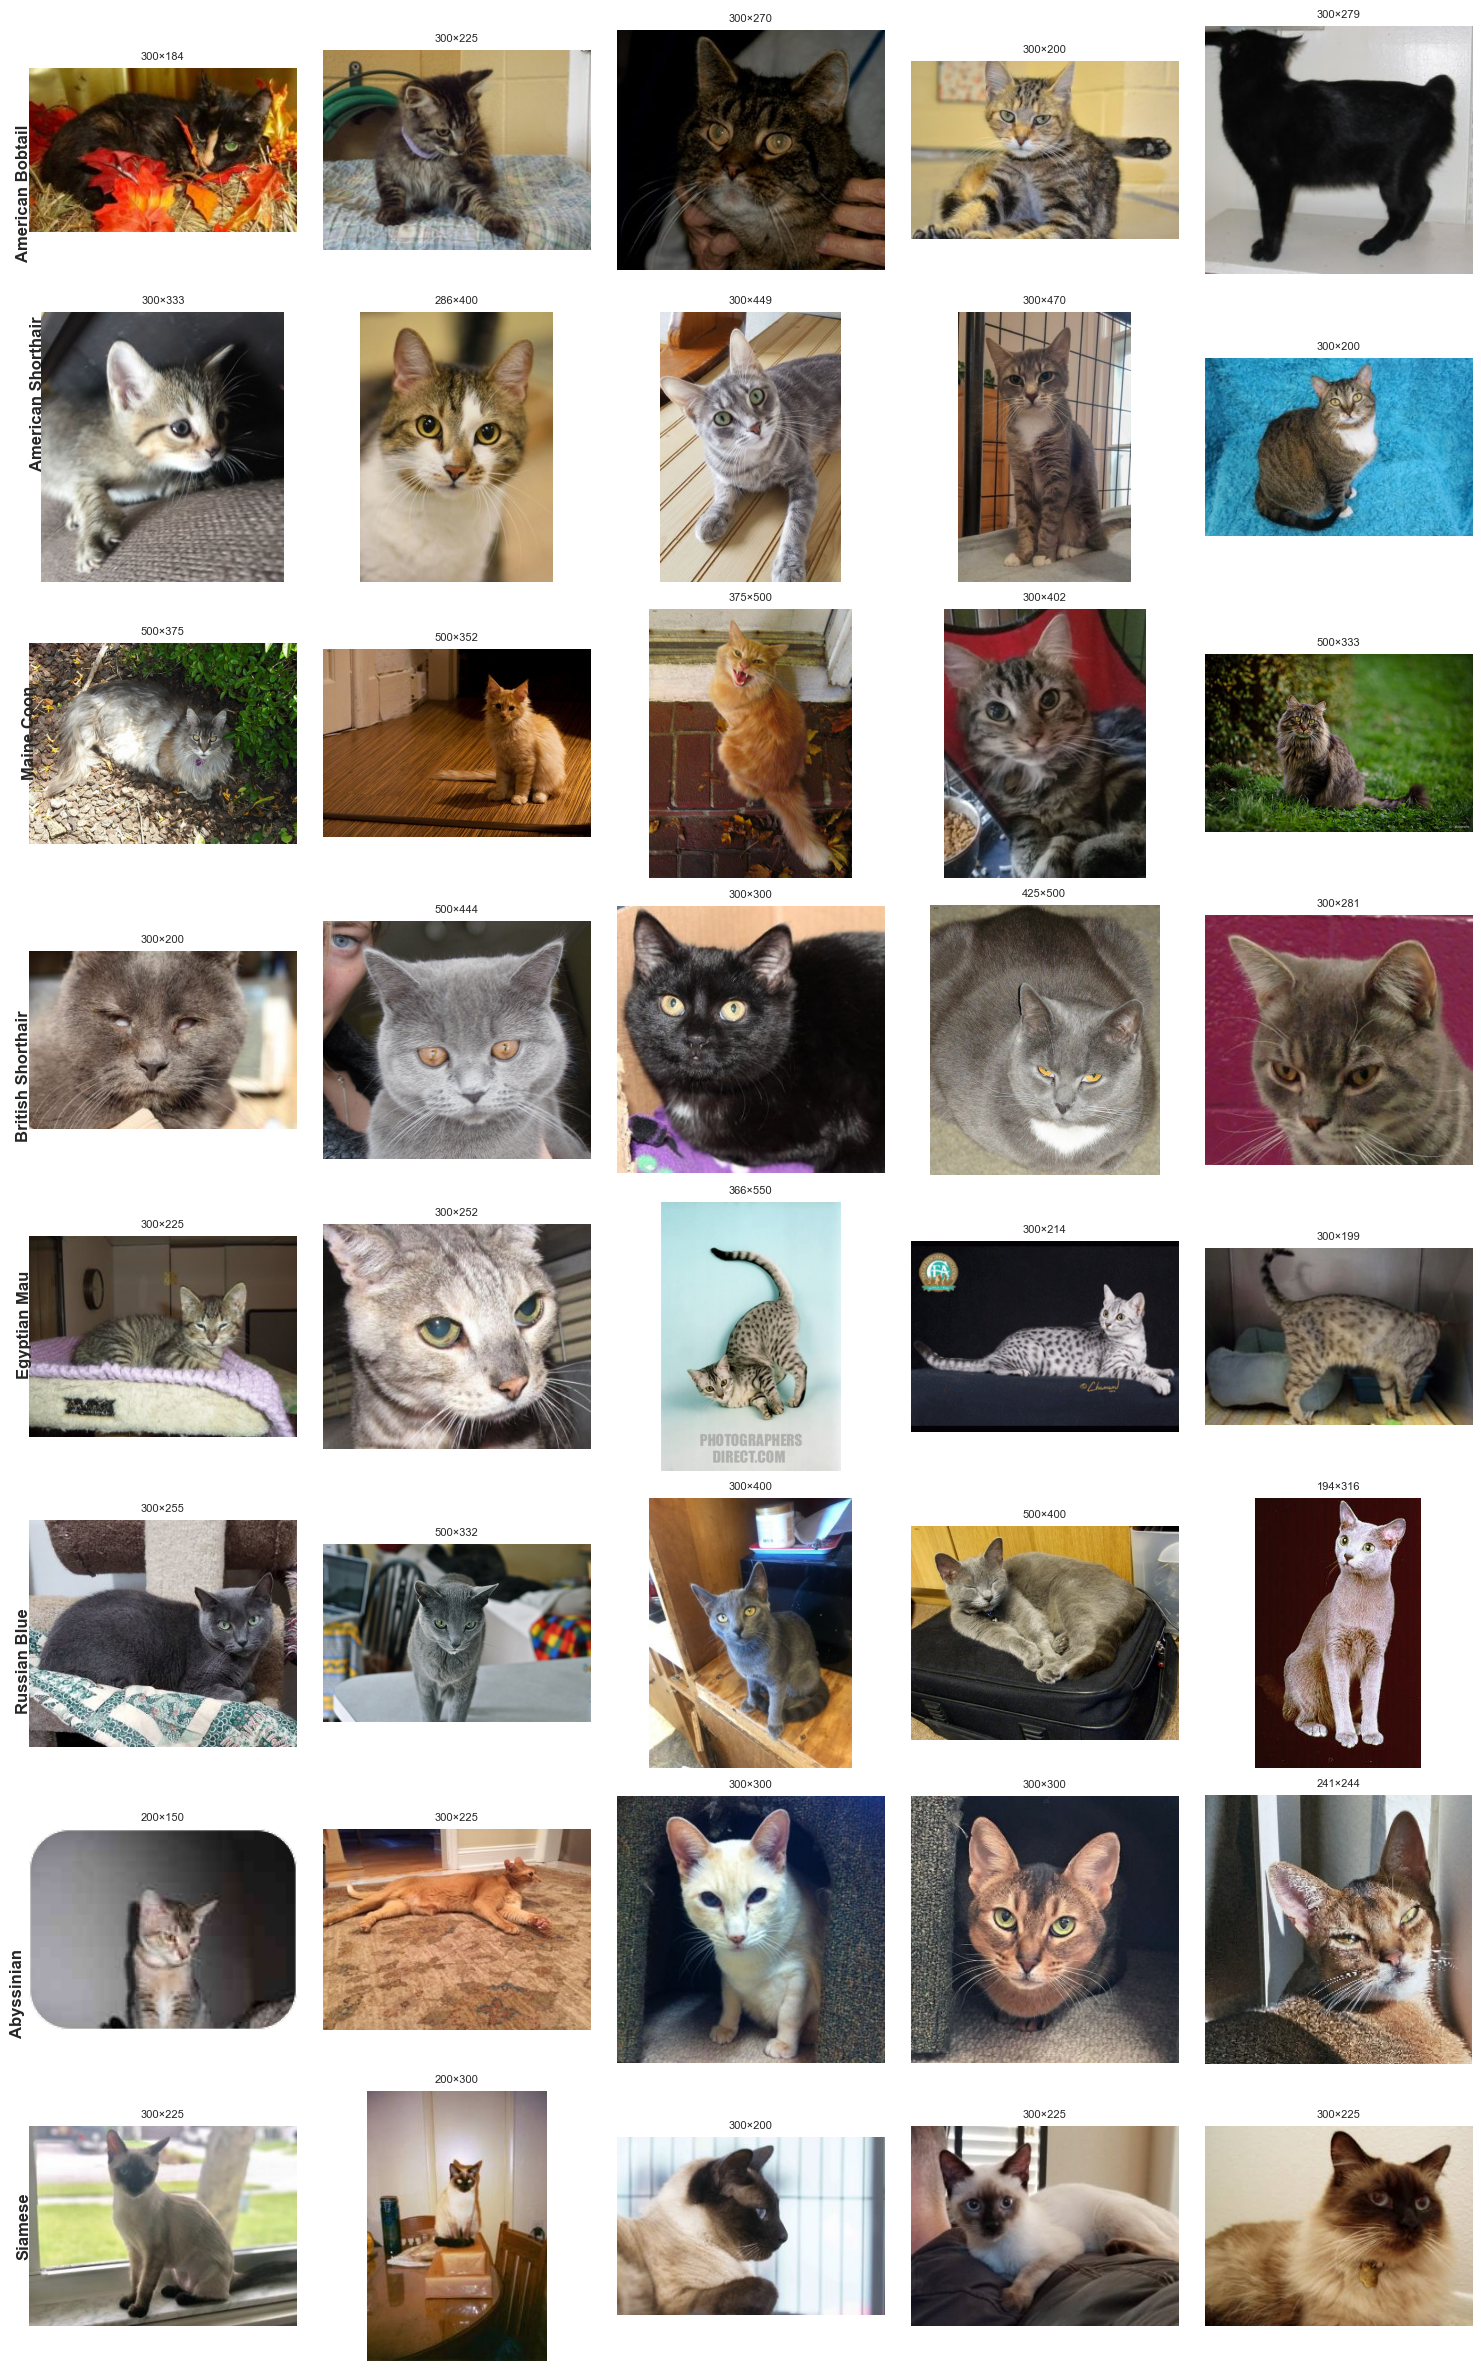

In [13]:
# Function to display sample images from each breed
def display_sample_images(data_dir: Path, breeds_to_show: List[str] = None, samples_per_breed: int = 5) -> None:
    """
    Display sample images from selected breeds.
    
    Args:
        data_dir: Path to the data directory
        breeds_to_show: List of breed names to display (if None, will use all breeds)
        samples_per_breed: Number of samples to show per breed
    """
    # If no breeds specified, use all
    if breeds_to_show is None:
        # Get all breed directories
        breed_dirs = [d for d in data_dir.iterdir() if d.is_dir()]
        breeds_to_show = [d.name for d in breed_dirs]
    else:
        # Filter to ensure all specified breeds exist
        breed_dirs = []
        for breed in breeds_to_show:
            breed_path = data_dir / breed
            if breed_path.exists() and breed_path.is_dir():
                breed_dirs.append(breed_path)
            else:
                logger.warning(f"Breed directory not found: {breed}")
    
    # Limit number of breeds if too many
    max_breeds = 8
    if len(breeds_to_show) > max_breeds:
        logger.info(f"Limiting display to {max_breeds} randomly selected breeds")
        random.shuffle(breeds_to_show)
        breeds_to_show = breeds_to_show[:max_breeds]
    
    # Create figure with subplots
    n_breeds = len(breeds_to_show)
    fig, axes = plt.subplots(n_breeds, samples_per_breed, figsize=(samples_per_breed * 3, n_breeds * 3))
    
    # If only one breed, make axes 2D
    if n_breeds == 1:
        axes = axes.reshape(1, -1)
    
    # Loop through each breed
    for i, breed in enumerate(breeds_to_show):
        breed_path = data_dir / breed
        
        # Get image files
        image_files = list(breed_path.glob('*.jpg')) + list(breed_path.glob('*.jpeg')) + list(breed_path.glob('*.png'))
        
        # Ensure we have enough samples
        if len(image_files) < samples_per_breed:
            logger.warning(f"Not enough images for {breed}. Only {len(image_files)} available.")
            selected_images = image_files
        else:
            selected_images = random.sample(image_files, samples_per_breed)
        
        # Display each sample
        for j, img_path in enumerate(selected_images):
            if j < samples_per_breed:  # Safeguard
                # Read image
                img = cv2.imread(str(img_path))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                
                # Display
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
                
                # Add resolution info
                height, width = img.shape[:2]
                axes[i, j].set_title(f"{width}×{height}", fontsize=8)
            
        # Add breed name to the first plot in the row
        if selected_images:
            axes[i, 0].text(-15, img.shape[0] // 2, breed, rotation=90, 
                           verticalalignment='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

# Select a subset of breeds to display (or use None to show all)
selected_breeds = list(breed_df['Breed'].head(8))  # Top 8 breeds by image count

# Display sample images
display_sample_images(DATA_DIR, breeds_to_show=selected_breeds, samples_per_breed=5)